In [1]:
import pandas as pd



In [14]:
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',85)

In [15]:
data = pd.read_csv('athlete_events.csv')

df_athletics_events = pd.DataFrame(data)

df_athletics_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
df_athletics_events.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [22]:
df_athletics_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [24]:
df_athletics_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [44]:
filter_male = df_athletics_events['Sex'] == 'M' 
filter_female = df_athletics_events['Sex'] == 'F' 

males = df_athletics_events.loc[filter_male]['Sex'].count()
females = df_athletics_events.loc[filter_female]['Sex'].count()


print ( f'Number of male participants is: {males}')
print (f'Number of female participants is: {females}')

Number of male participants is: 196594
Number of female participants is: 74522


In [49]:
percentage_males = 196594 / (196594 + 74522)
percentage_females = 1 - percentage_males

print(f'Males % = {round(percentage_males, 2)}')
print(f'Female % = {round(percentage_females, 2)}') 

Males % = 0.73
Female % = 0.27


In [53]:
import seaborn as sns

In [ ]:
sns.countplot(x='Sex', data = df_athletics_events, palette=['#432371',"#FAAE7B"])

C:\Users\Dusan\AppData\Local\Temp\ipykernel_23656\1028274478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sex', palette=['#432371',"#FAAE7B"], data=df_athletics_events)


<Axes: xlabel='Sex', ylabel='count'>

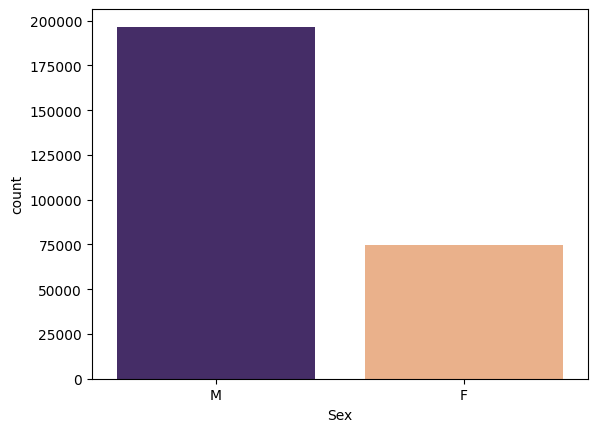

In [61]:
sns.countplot(x = 'Sex', palette=['#432371',"#FAAE7B"], data=df_athletics_events)

In [68]:
# The athletes with the most number of appearances
most_apearances = df_athletics_events.Name.value_counts()
most_apearances

Name
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: count, Length: 134732, dtype: int64

In [73]:
max_appearances = most_apearances.max()
max_appearances

58

In [82]:
# Details of the athlete with the most appearances
filter = df_athletics_events['Name'] == 'Robert Tait McKenzie'

df_athletics_events.loc[filter].sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154812,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
154818,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
154820,77710,Robert Tait McKenzie,M,65.0,NaN,NaN,Canada,CAN,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
154804,77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
154852,77710,Robert Tait McKenzie,M,69.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


In [94]:
most_apearances.index
RTM = most_apearances.loc['Robert Tait McKenzie']
print(f'The most number of appearences at the Olympic games goes to: {RTM}')


The most number of appearences at the Olympic games goes to: 58
